In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
file_path = 'C:\\Users\\Dell\\Downloads\\data.csv'
df = pd.read_csv(file_path)


In [3]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(columns=['id', 'Unnamed: 32','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
        'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ])

In [6]:
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.0

In [7]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [8]:
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812              

In [9]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
results = {}

In [13]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1 Score': f1_score(y_test, y_pred_log_reg)
}


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.9386


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = (lin_reg.predict(X_test) > 0.5).astype(int)
results['Linear Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lin_reg),
    'Precision': precision_score(y_test, y_pred_lin_reg),
    'Recall': recall_score(y_test, y_pred_lin_reg),
    'F1 Score': f1_score(y_test, y_pred_lin_reg)
}

In [19]:
accuracy = accuracy_score(y_test, y_pred_lin_reg)


print(f"Accuracy of Linear Regression: {accuracy:.4f}")

Accuracy of Linear Regression: 0.9298


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn)
}
accuracy = accuracy_score(y_test, y_pred_knn)


print(f"Accuracy of K-Nearest Neighbors: {accuracy:.4f}")

Accuracy of K-Nearest Neighbors: 0.9474


In [21]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm)
}
accuracy = accuracy_score(y_test, y_pred_svm)


print(f"Accuracy of SVM with Linear Kernel: {accuracy:.4f}")

Accuracy of SVM with Linear Kernel: 0.9386


In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}
accuracy = accuracy_score(y_test, y_pred_rf)

# Print the accuracy score
print(f"Accuracy of Random Forest: {accuracy:.4f}")

Accuracy of Random Forest: 0.9561


In [23]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int32  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int32(1)
memory usage: 46.8 KB
None
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.00000

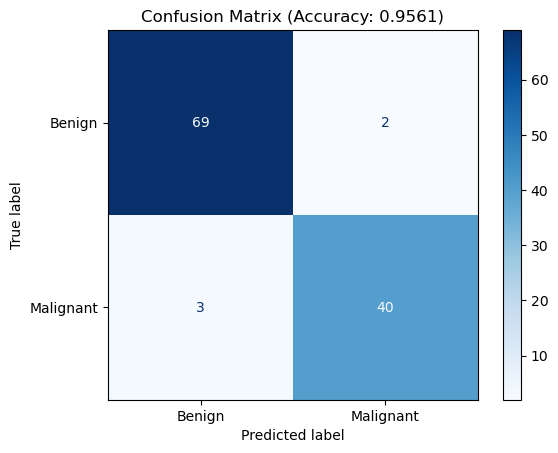

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred_rf)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.4f})')
plt.show()


In [26]:
import numpy as np



#input new patient data for prediction
def predict_cancer(model, scaler):
   
    feature_names = [
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    ]
    
   
    input_data = []
    print("Enter the following values:")
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_data.append(value)
    
    
    input_data = np.array(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    
   
    prediction = model.predict(input_data_scaled)
    
    # Output result
    if prediction[0] == 1:
        print("\nThe model predicts that the patient has **Malignant (Cancerous)** tumor.")
    else:
        print("\nThe model predicts that the patient has **Benign (Non-Cancerous)** tumor.")


best_model = rf  
scaler = scaler  


predict_cancer(best_model, scaler)


Enter the following values:
radius_mean: 13
texture_mean: 12.4
perimeter_mean: 120.4
area_mean: 560.23
smoothness_mean: 0.12
compactness_mean: 0.34
concavity_mean: 0.01
concave points_mean: 0.1
symmetry_mean: 0.2
fractal_dimension_mean: 0.33

The model predicts that the patient has **Benign (Non-Cancerous)** tumor.


C:\Users\Dell\.anaconda\PPA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np

# Input new patient data for prediction
def predict_cancer(model, scaler):
    feature_names = [
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    ]
    
    # Collect user input
    input_data = []
    print("Enter the following values:")
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_data.append(value)
    
    # Create a DataFrame for consistency with scaler
    input_data_df = pd.DataFrame([input_data], columns=feature_names)
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data_df)
    
   
    prediction = model.predict(input_data_scaled)
    
    # Output result
    if prediction[0] == 1:
        print("\nThe model predicts that the patient has **Malignant (Cancerous)** tumor.")
    else:
        print("\nThe model predicts that the patient has **Benign (Non-Cancerous)** tumor.")


best_model = rf  
scaler = scaler  

predict_cancer(best_model, scaler)


NameError: name 'rf' is not defined

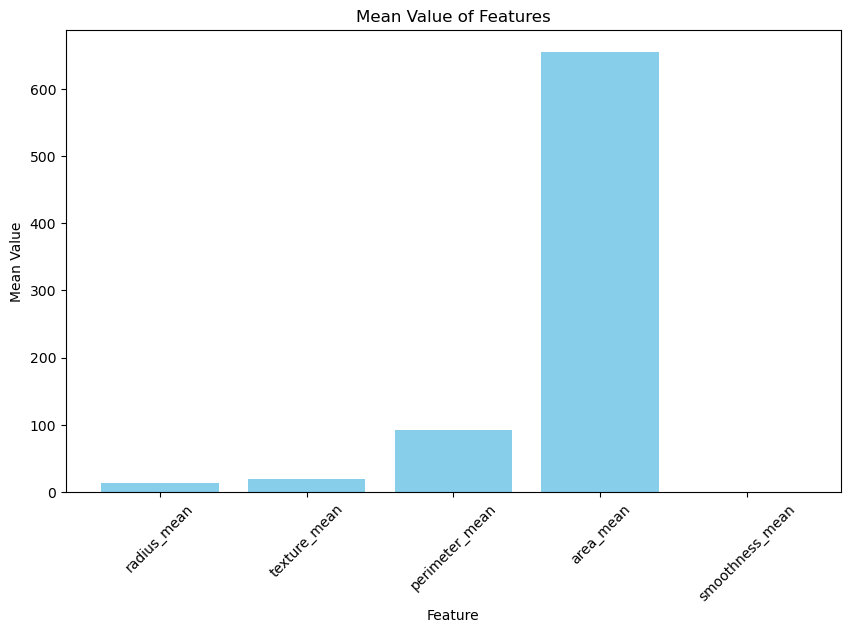

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {
    'Feature': ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'],
    'Mean_Value': [14.1, 19.3, 92.0, 655.0, 0.096]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Feature'], df['Mean_Value'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.title('Mean Value of Features')
plt.xticks(rotation=45)
plt.show()


In [4]:
import pandas as pd
import numpy as np

# Input new patient data for prediction
def predict_cancer(model, scaler):
    feature_names = [
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    ]
    
    # Collect user input
    input_data = []
    print("Enter the following values:")
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_data.append(value)
    
    # Create a DataFrame for consistency with scaler
    input_data_df = pd.DataFrame([input_data], columns=feature_names)
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data_df)
    
   
    prediction = model.predict(input_data_scaled)
    
    # Output result
    if prediction[0] == 1:
        print("\nThe model predicts that the patient has **Malignant (Cancerous)** tumor.")
    else:
        print("\nThe model predicts that the patient has **Benign (Non-Cancerous)** tumor.")


best_model = rf  
scaler = scaler  

predict_cancer(best_model, scaler)


NameError: name 'rf' is not defined